<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/01_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Reading Netcdf file for each year

In [ ]:
from google.colab import drive
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

drive.mount("/content/gdrive/")

file = '/content/gdrive/My Drive/Colab Notebooks/IMD/rain_1901.nc'




Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
ds = nc.Dataset(file)
print(ds)

# print the dimensions of the nc file
print(ds.dimensions)
print(ds.variables)
print("======= Variable names on seperate line =====")
# print one by one
for var in ds.variables:
  print(var)


In [ ]:
latitude=ds.variables['lat'][:]
longitude=ds.variables['lon'][:]
day=ds.variables['time'][:]
rainfall=ds.variables['rain'][:]

In [ ]:
ds.close()

2. Visualizing Data- 1 Day rainfall plot

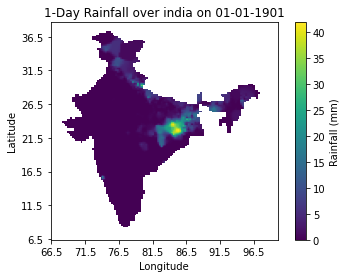

In [83]:
plt.imshow(rainfall[:,:,1])
cbar=plt.colorbar()
cbar.set_label('Rainfall (mm)')
x=np.arange(0, 140, 20)
plt.xticks(x,longitude[x])
y=x=np.arange(0, 140, 20)
plt.yticks(y,latitude[y])
plt.gca().invert_yaxis()
plt.title("1-Day Rainfall over india on 01-01-1901")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

